# Introduction to data processing with PySpark
**Note: This notebook is for use on Google Colab. For running pyspark locally you need to first install PySpark and then follow [this notebook](data_processing_pyspark.ipynb).**

## Installation of Java and Spark

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q www-us.apache.org/dist/spark/spark-2.4.0/spark-2.4.0-bin-hadoop2.7.tgz  
!tar xf spark-2.4.0-bin-hadoop2.7.tgz
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"]="/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"]="/content/spark-2.4.0-bin-hadoop2.7"

In [ ]:
import findspark
findspark.init()

## Upload data
### Method 1

In [ ]:
from google.colab import files
files.upload();

In [ ]:
!mkdir ../data
!mv lausanne_rental.csv ../data

### Method 2

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

## Import libraries

In [1]:
import pandas as pd
from pyspark.sql import SparkSession

## Import data 
Import the lausanne rental data stored in `../data/lausanne_rentl.csv` as a Dataframe.

**Pandas**

In [2]:
df = 

**PySpark**

In [3]:
spark = SparkSession.builder.getOrCreate()

In [4]:
dfs = 

## Preprocessing

Quick look: show the first 5 rows of the dataframe. 

**Pandas**

**Spark**

**Possible convert to pandas:** 

As you see the PySpark output is not as nice as the Pandas. Any solutions? Can you pass in the output of PySpark to a Pandas dataframe? 

In [ ]:
pd.DataFrame()

### Get column names

Get the column names:

**Pandas**

**PySpark**

### Get types

**Pandas**

**PySpark**

Note that the types in PySpark dont match with those of Pandas. This is becauase pandas automatically recognizes (guesses) the types, while in PySpark we need to explicitely specify the types. 

### Converting column types (or Add columns)

**Pandas**

As you saw above the `id` column is in `float24` format. Can you convert it to `int`?

In [29]:
df['Id'] = df['Id']. # complete

In [ ]:
df.dtypes # now check if it worked

**PySpark**

As you saw above all the PySpark dataframe types were reported as `string`. Now we want to convert `Id` to `int`, `SurfaceArea`, `Rent`, `NumRooms` to `float`. 

In [50]:
dfs = dfs.withColumn() # complete
dfs = dfs.withColumn()
dfs = dfs.withColumn()
dfs = dfs.withColumn()

In [ ]:
dfs.dtypes # check if it worked

### Rename Columns

**Pandas**

In [9]:
dftmp = df.copy()  # if you don't put the .copy() dftmp "points" to the same dataframe as df, so any change of dftmp affects df

In [10]:
dftmp.columns

Index(['Id', 'SurfaceArea', 'NumRooms', 'Type', 'Address', 'Description',
       'Rent', 'Bookmark', 'Link'],
      dtype='object')

Rename the dftmp columns to A, B, C, D, E, F, G, H, I:

In [11]:
dftmp.columns =  

In [ ]:
dftmp.columns # check

Now rename only column A back to Id: 

In [13]:
dftmp = 

In [ ]:
dftmp.head() # check if it worked

**PySpark**

Rename the dftmp columns to A, B, C, D, E, F, G, H, I:

In [ ]:
dfs. # complete. Hint: Use dfs.toDF(?) note that the changes in PySpark are immutable

In [ ]:
dfs.columns # check

Now rename only column A back to Id: 

In [ ]:
dfs. # complete again immutable

In [ ]:
dfs.columns # check

### Drop columns

**Pandas**

Drop the Id column.

In [ ]:
df # Note: is immutable

**PySpark**:

In [ ]:
dfs

### Summary Statistics: Describe

**Pandas**

**PySpark**

Can you show the output more nicely? Hint: use `.toPandas()`. 

### Slicing (Filtering)

**Pandas**

Define a dataframe from `df` of apartment listings with a surface area less than 50 m2. 

**PySpark**

### Aggregate functions

**Pandas**

In [96]:
df['Rent'].mean()

1993.539115646258

In [108]:
df['Rent'].max()

8900.0

**PySpark**

In [98]:
dfs['Rent'].mean()

TypeError: 'Column' object is not callable

Does not work out the same way! You need to first download the PySpark SQL functions:

In [99]:
from pyspark.sql import functions as F

In [142]:
dfs.select(F.mean('Rent')).show()

+------------------+
|         avg(Rent)|
+------------------+
|1984.3287904599658|
+------------------+



In [128]:
dfs.select(F.max('Rent')).show()

+---------+
|max(Rent)|
+---------+
|   8900.0|
+---------+



If you want to get the value:

In [165]:
value = dfs.select(F.mean('Rent')).collect()[0].asDict()['avg(Rent)']
value

1984.3287904599658

### Fill Nulls

**Pandas**

In [240]:
df['Rent'] = df['Rent'].fillna(df['Rent'].mean()) # generally not a good way of filling nan, how about median? How about filling based on correlation with other features? 
df['NumRooms'] = df['NumRooms'].fillna(df['NumRooms'].mean())

**PySpark**

In [175]:
dfs = dfs.fillna(value, subset=['Rent'])

In [252]:
value_numrooms = dfs.select(F.mean('NumRooms')).collect()[0].asDict()['avg(NumRooms)']

In [253]:
dfs = dfs.fillna(value_numrooms, subset=['NumRooms'])

### Aggregation

What is the averagne rent for apartments with different room numbers in Lausanne? So, we want a list of room numbers with their average rent. 

**Pandas**

**PySpark**

Can you list the average surface area as well as the average rent?

### Transformations

**Pandas**

In [195]:
import numpy as np

In [197]:
df['logRent'] = np.log(df['Rent'])

In [201]:
df.head()

,Id,SurfaceArea,NumRooms,Type,Address,Description,Rent,Bookmark,Link,logRent
0,5286965,52.0,2.5,flat,"Route Aloys-Fauquez 124, 1018 Lausanne, VD",Agréable 2 pièces proche de toutes les commodités,1460.0,New,/en/d/flat-rent-lausanne/5286965?s=2&t=1&l=202...,7.286192
1,5277530,80.0,3.0,flat,"Avenue de Béthusy 53, 1012 Lausanne, VD",Proche du centre ville,2100.0,NaN,/en/d/flat-rent-lausanne/5277530?s=2&t=1&l=202...,7.649693
2,5249019,74.0,3.5,stepped-apartment,"Route des Plaines-du-Loup 42, 1018 Lausanne, VD","Magnifique 3,5 pièces avec jardin privé -Immeu...",2150.0,Highlight,/en/d/stepped-apartment-rent-lausanne/5249019?...,7.673223
3,5274375,108.0,3.5,duplex-maisonette,"Route de Prilly 12, 1004 Lausanne, VD",Magnifique logement en duplex entièrement neuf,3160.0,NaN,/en/d/duplex-maisonette-rent-lausanne/5274375?...,8.058327
4,5274374,80.0,3.5,flat,"Route de Prilly 12, 1004 Lausanne, VD",Nouveaux logements,2085.0,NaN,/en/d/flat-rent-lausanne/5274374?s=2&t=1&l=202...,7.642524


**PySpark**

In [196]:
import pyspark.sql.functions as F

In [203]:
dfs = dfs.withColumn('logRent', F.log(dfs['Rent']))

In [200]:
dfs.show()

+-------+-----------+--------+--------------------+--------------------+--------------------+------+---------+--------------------+-----------------+
|     Id|SurfaceArea|NumRooms|                Type|             Address|         Description|  Rent| Bookmark|                Link|          logRent|
+-------+-----------+--------+--------------------+--------------------+--------------------+------+---------+--------------------+-----------------+
|5286965|       52.0|     2.5|                flat|Route Aloys-Fauqu...|Agréable 2 pièces...|1460.0|      New|/en/d/flat-rent-l...|7.286191714702382|
|5277530|       80.0|     3.0|                flat|Avenue de Béthusy...|Proche du centre ...|2100.0|     null|/en/d/flat-rent-l...|7.649692623711514|
|5249019|       74.0|     3.5|   stepped-apartment|Route des Plaines...|Magnifique 3,5 pi...|2150.0|Highlight|/en/d/stepped-apa...|7.673223121121708|
|5274375|      108.0|     3.5|   duplex-maisonette|Route de Prilly 1...|Magnifique logeme...|3160.0|

**Note**: pyspark.sql.functions perform fast computations as the whole calcluations are doen in JVM! 

### User-defined functions

In [208]:
df['NumRoomsOnly'] = df['NumRooms'].apply(lambda x: x - 1)

In [209]:
df.head()

,Id,SurfaceArea,NumRooms,Type,Address,Description,Rent,Bookmark,Link,logRent,NumRoomsOnly
0,5286965,52.0,2.5,flat,"Route Aloys-Fauquez 124, 1018 Lausanne, VD",Agréable 2 pièces proche de toutes les commodités,1460.0,New,/en/d/flat-rent-lausanne/5286965?s=2&t=1&l=202...,7.286192,1.5
1,5277530,80.0,3.0,flat,"Avenue de Béthusy 53, 1012 Lausanne, VD",Proche du centre ville,2100.0,NaN,/en/d/flat-rent-lausanne/5277530?s=2&t=1&l=202...,7.649693,2.0
2,5249019,74.0,3.5,stepped-apartment,"Route des Plaines-du-Loup 42, 1018 Lausanne, VD","Magnifique 3,5 pièces avec jardin privé -Immeu...",2150.0,Highlight,/en/d/stepped-apartment-rent-lausanne/5249019?...,7.673223,2.5
3,5274375,108.0,3.5,duplex-maisonette,"Route de Prilly 12, 1004 Lausanne, VD",Magnifique logement en duplex entièrement neuf,3160.0,NaN,/en/d/duplex-maisonette-rent-lausanne/5274375?...,8.058327,2.5
4,5274374,80.0,3.5,flat,"Route de Prilly 12, 1004 Lausanne, VD",Nouveaux logements,2085.0,NaN,/en/d/flat-rent-lausanne/5274374?s=2&t=1&l=202...,7.642524,2.5


Pyspark user-defined function, note that the udf has to be deterministic. 

In [220]:
from pyspark.sql.types import FloatType

In [221]:
myFun = F.udf(lambda x: x - 1, returnType=FloatType()) # need to specify the return type otherwise you may get NaN

In [254]:
dfs2 = dfs.withColumn('NumRoomsOnly', myFun(dfs['NumRooms'])) # Note that if you don't fillna you get an error when you collect the data i.e. in the next line! 

In [255]:
dfs2.show()

+-------+-----------+---------+--------------------+--------------------+--------------------+------+---------+--------------------+------------+
|     Id|SurfaceArea| NumRooms|                Type|             Address|         Description|  Rent| Bookmark|                Link|NumRoomsOnly|
+-------+-----------+---------+--------------------+--------------------+--------------------+------+---------+--------------------+------------+
|5286965|       52.0|      2.5|                flat|Route Aloys-Fauqu...|Agréable 2 pièces...|1460.0|      New|/en/d/flat-rent-l...|         1.5|
|5277530|       80.0|      3.0|                flat|Avenue de Béthusy...|Proche du centre ...|2100.0|     null|/en/d/flat-rent-l...|         2.0|
|5249019|       74.0|      3.5|   stepped-apartment|Route des Plaines...|Magnifique 3,5 pi...|2150.0|Highlight|/en/d/stepped-apa...|         2.5|
|5274375|      108.0|      3.5|   duplex-maisonette|Route de Prilly 1...|Magnifique logeme...|3160.0|     null|/en/d/duplex-

### Creata dataframe

**Pandas**

In [ ]:
myMap = {'id':[121, 122, 123], 'name':['John', 'Mary', 'Alice']}

In [ ]:
df0 = # Create a dataframe from myMap 

**PySpark**

In [ ]:
df0s = spark.createDataFrame(myMap) # does this work? 

In [ ]:
from pyspark.sql.types import *

Similar to SQL to make a dataframe ("table" in SQL) you need to specify the types for each column.

In [ ]:
fields = [StructField('id', IntegerType(), nullable=False), StructField('name', StringType(), nullable=True)]
schema = StructType(fields)

In [ ]:
df0s = spark.createDataFrame(myMap, schema=schema) # does this one work now? 

The entries need to be inserted "row by row":

In [ ]:
myMapS = [[121, 'John'], [122, 'Mary'], [123, 'Alice']]

In [ ]:
df0s = spark.createDataFrame(myMapS, schema=schema)

In [ ]:
df0s.show()

Or:

In [ ]:
df0s = spark.createDataFrame(df0) # from pandas dataframe! 

In [ ]:
df0s.show()

### Join/Merge 

**Pandas**

In [23]:
map1 = {'name':['Switzerland', 'France', 'Germany', 'Italy'], 'AlphaCode':['CH', 'FR', 'DE', 'IT']}
df1 = pd.DataFrame(map1)

In [25]:
map2 = {'AlphaCode':['FR', 'CH', 'IT', 'DE'], 'Population':[67, 8.5, 60, 82]}
df2 = pd.DataFrame(map2)

In [20]:
df1

,name,AlphaCode
0,Switzerland,CH
1,France,FR
2,Germany,DE
3,Italy,IT


In [21]:
df2

,AlphaCode,Population
0,FR,67.0
1,CH,8.5
2,IT,60.0
3,DE,82.0


Get a table with name of the countries, their Alpha code and their population.

**PySpark**

In [29]:
df1s = spark.createDataFrame(df1) # you can create a Spark dataframe from a Pandas dataframe
df2s = spark.createDataFrame(df2) 

In [31]:
df1s.join(df2s, on='AlphaCode').show()

+---------+-----------+----------+
|AlphaCode|       name|Population|
+---------+-----------+----------+
|       DE|    Germany|      82.0|
|       FR|     France|      67.0|
|       CH|Switzerland|       8.5|
|       IT|      Italy|      60.0|
+---------+-----------+----------+



### Plotting

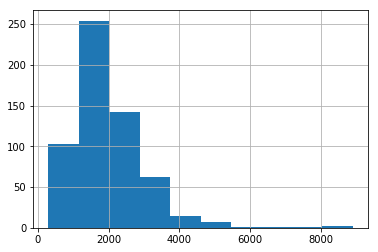

In [34]:
df['Rent'].hist()

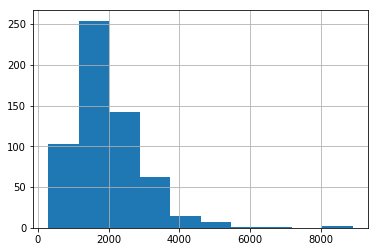

In [58]:
dfs.toPandas()['Rent'].hist()

However, usually `dfs` is too big to be able to plot it (otherwise you may use pandas from the beginning), solution? Sampling:

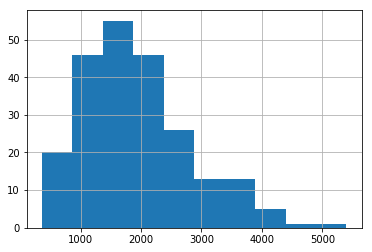

In [60]:
dfs.sample(withReplacement=False, fraction=0.4).toPandas()['Rent'].hist()

### SQL

**Pandas**

no built-in SQL to Pandas! 

**PySpark**

In [62]:
dfs.createOrReplaceTempView('dfview')

In [66]:
spark.sql('SELECT Address, Rent FROM dfview WHERE Rent < 1000').show()

+--------------------+-----+
|             Address| Rent|
+--------------------+-----+
|Av. de Chailly 52...|360.0|
|Av. de Chailly 52...|380.0|
|Av. de Riant-Mont...|637.0|
|Av. de Tivoli 19B...|725.0|
|Isabelle de Monto...|780.0|
|Rue St-Martin 28,...|840.0|
|Avenue Sainte-Luc...|850.0|
|Chemin de Montoli...|860.0|
|Ch. du Devin 64, ...|940.0|
|Chemin des Alling...|300.0|
|   1007 Lausanne, VD|400.0|
|1004 Lausanne, VD...|500.0|
|Chemin de Longera...|500.0|
|Chailly, 1012 Lau...|600.0|
|   1004 Lausanne, VD|600.0|
|Avenue de Rhodani...|600.0|
|1007 Lausanne, 10...|600.0|
|avenue Druey coll...|600.0|
|Avenue Marc-Dufou...|640.0|
|   1010 Lausanne, VD|650.0|
+--------------------+-----+
only showing top 20 rows

